### Problem Statement
A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Steps Performed
- Loading the Data from the given csv file.
- Performing data verification and validation to find the quality of given data.
- Data visualization using various charts.
- Building a correlation matrix using Heatmap to verify the multicollinearity between variables.
- Dropping non-relevant columns from the data frame.
- Data preparation for Modelling.
- Splitting the Data into Training and Testing Sets.
- Preparing X and y sets for train and test.
- Building a linear model.
- Dropping insignificant varibles and repeating the model building.
- Residual Analysis to check whether error terms are normally distributed.
- Making Predictions.
- Model Evaluation.
- Result Comparison Train Vs Test.

In [129]:
# Importing necessary libaries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 1 -  Loading the Data from the given csv file

In [130]:
# Reading the given CSV file, day.csv
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2 - Performing data verification and validation to find the quality of given data

In [131]:
# Checking the number of rows and columns present in the data set
bike.shape

(730, 16)

In [132]:
# Populating the summary of Numeric columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [133]:
# Checking data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [134]:
# Checking the presence of Null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Note:-

No null values are observed in the dataset

In [135]:
# Renaming the labes of some columns for better understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Converting the following feature values into categorical string values
 1. season
 2. month
 3. weathersit
 4. weekday

In [136]:
# Converting from categorical to string values

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 3 - Data visualization using various charts

In [137]:
# Segregating continuous and categorical variables using unique keyword
bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

### Verifying the linear relation between Predictor and Target variable using pairplot.

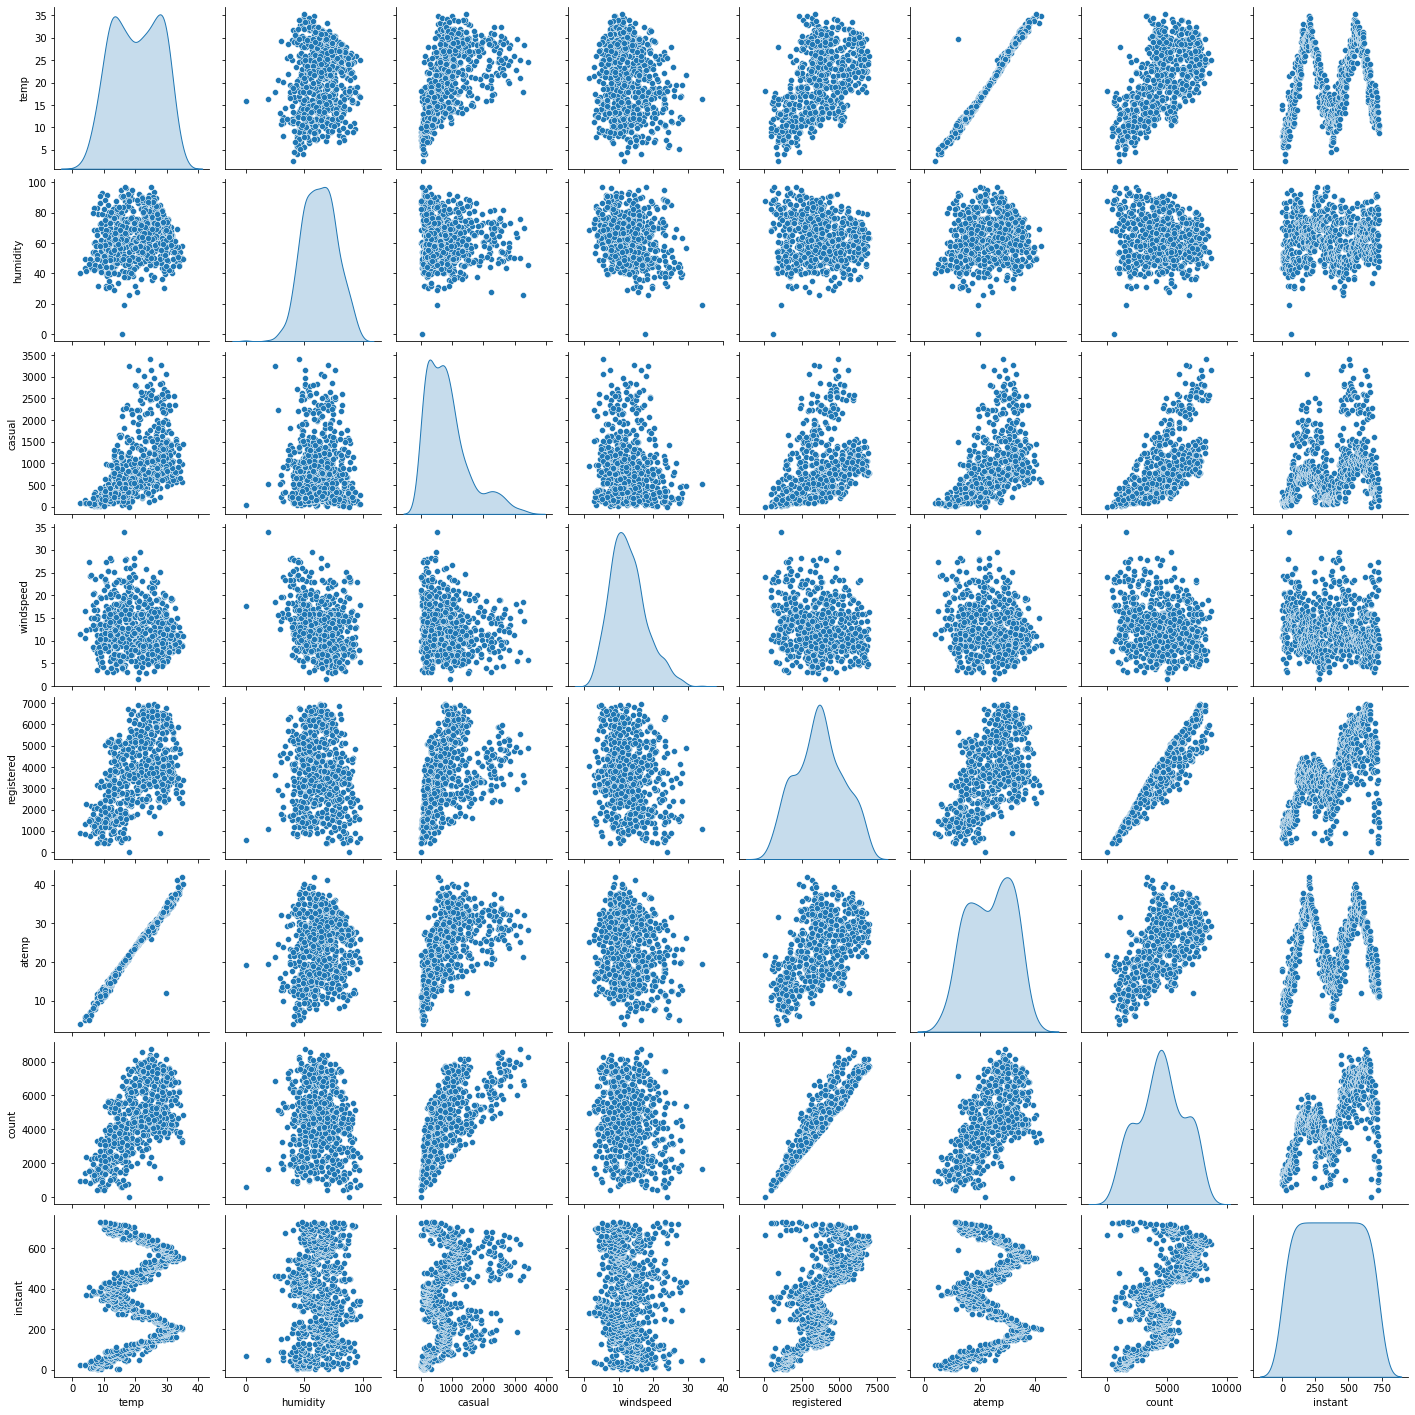

In [138]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'],diag_kind='kde')
plt.show()

### Plotting categorical variables against target variable (count) using boxplot & subplot

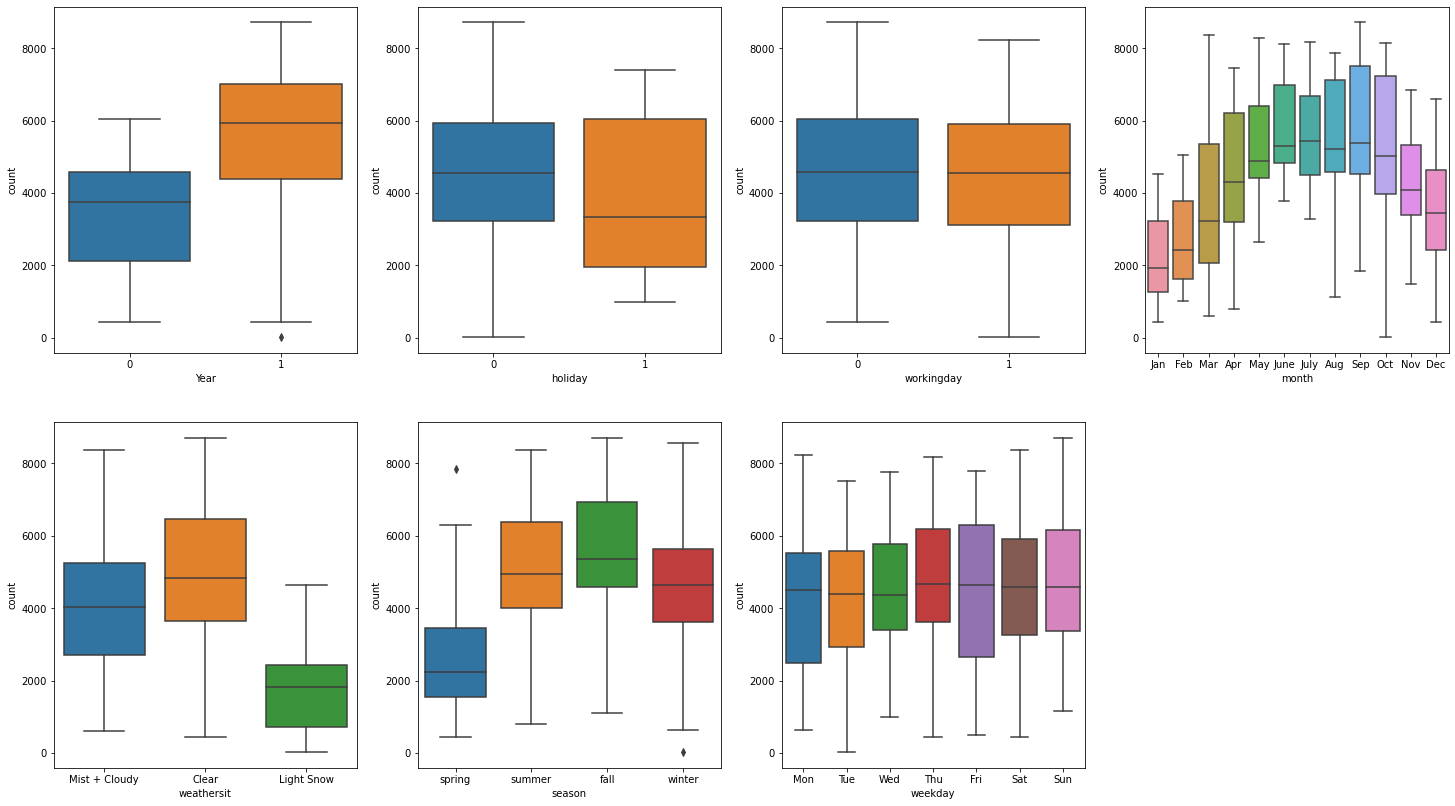

In [139]:
plt.figure(figsize=(25, 14))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.show()

### We can observe the following from the above charts:-

    There is a significant increase in bike rentals in 2019 compared to 2018.
    The count of bike rentals are more on days where the weather is clear.
    The bike rentals are higher on fall followed by summer season.
    Thursdays and Saturdays are having comparitively better bike rentals than other days of week.
    August, September & October months are having highest demaand for bike rentals.


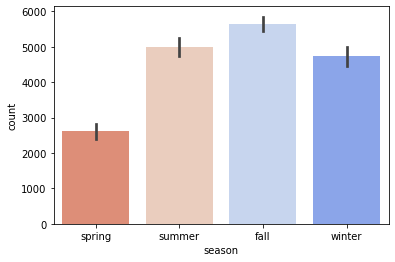

In [140]:
# Analysing season vs bike rental count to understand the relation between season and count
sns.barplot('season','count',data=bike, palette='coolwarm_r')
plt.show()

### Note:- 
We could observe that the bike rentals are more in Fall season followed by Summer.

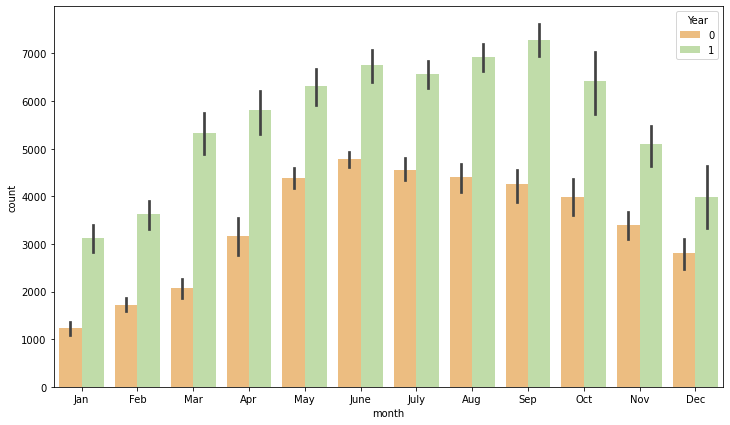

In [141]:
# Comparing montly bike rental of 2018 vs 2019 
plt.figure(figsize=(12,7))
sns.barplot('month','count',hue='Year',data=bike,palette='Spectral')
plt.show()

### Note:-
- We could observe that 2019 is having more bike rentals than 2018 with similar monthly patterns for some months.

- Overall, we could infer that the season & temperature plays a major role in the bike rental numbers for both the years.

- There is a steady increase of bike rentals in "summer" and "fall" seaon for 2018 and 2019

### Step 4 - Building a correlation matrix using Heatmap to verify the multicollinearity between variables.

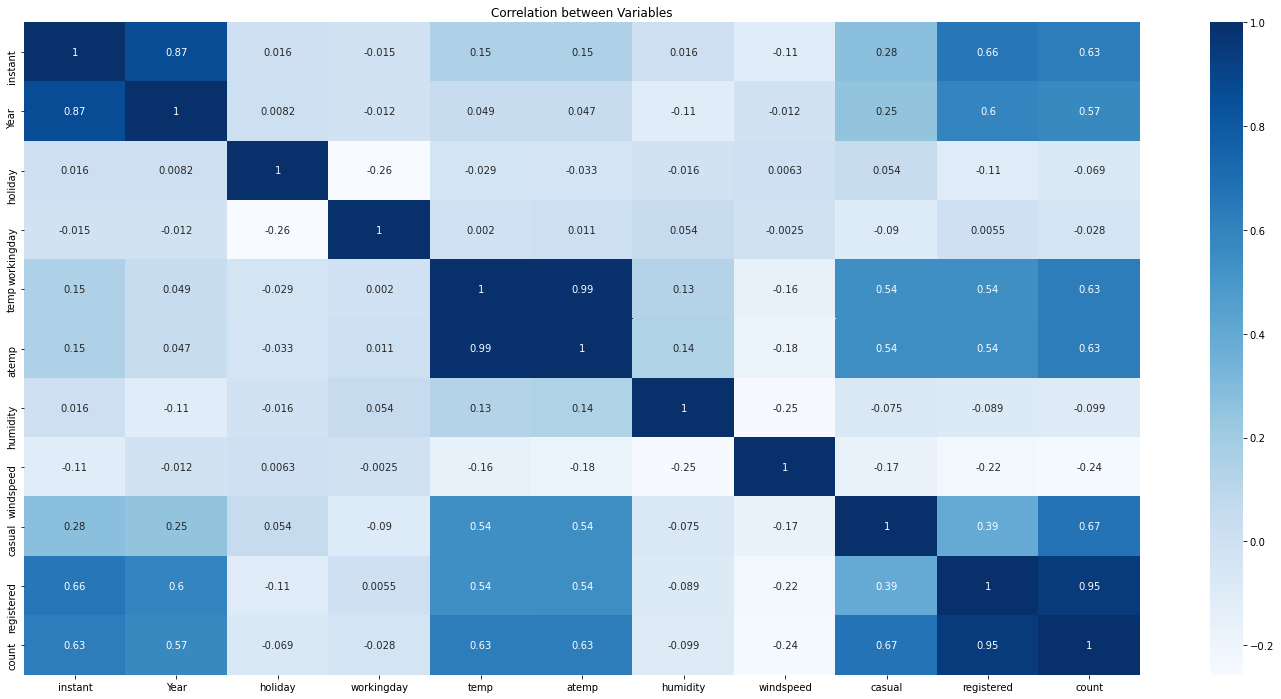

In [142]:
# Plotting the data in a Heatmap to verify the correlation between predictor variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='Blues', annot = True)
plt.title("Correlation between Variables")
plt.show()

### Notes:-

- The above heatmap helps us to identify variables which are multicollinear in nature. This also helps us to understand the high collinearity of predictor variables with the target variable.

- We will be referring this heatmamp to selcect the relevant variables for model buildig.

- The predictor variable temp is highly contributing towards the target variable total count of bike rentals.

- The predictor variables temp & atemp are highly positively correlated with each other. We can consider them as redundnat variables and can be eliminated during the model building process.


### Step 5 -  Dropping non-relevant columns from the data frame.
- Instant is an index variable and can be removed.
- Casual and registered are removed as it is already included in the "count" variable.
- temp and atemp looks redundant and shall be removed.
- dteday is not relevant. We are considering only days, month & season for model building.

In [143]:
# Dropping non-relevant columns from the data frame.
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Step 6 - Data preparation for Modelling

In [144]:
# Creating the dummy variables for the categorical variables month, season, weathersit & weekday.
# After creating dummy varilables, the original variables are dropped.

month_dummy =pd.get_dummies(bike.month,drop_first=True)
season_dummy =pd.get_dummies(bike.season,drop_first=True)
weathersit_dummy =pd.get_dummies(bike.weathersit,drop_first=True)
weekday_dummy =pd.get_dummies(bike.weekday,drop_first=True)


In [145]:
# The resultant dummy varilable is added to the original dataframe.
bike=pd.concat([month_dummy,season_dummy,weathersit_dummy,weekday_dummy,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,spring,summer,winter,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [146]:
# Dropping the columns after appending dummy variables.
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,spring,summer,winter,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [147]:
# Checking the shape of modified dataframe after dropping the columns.
bike.shape

(730, 29)

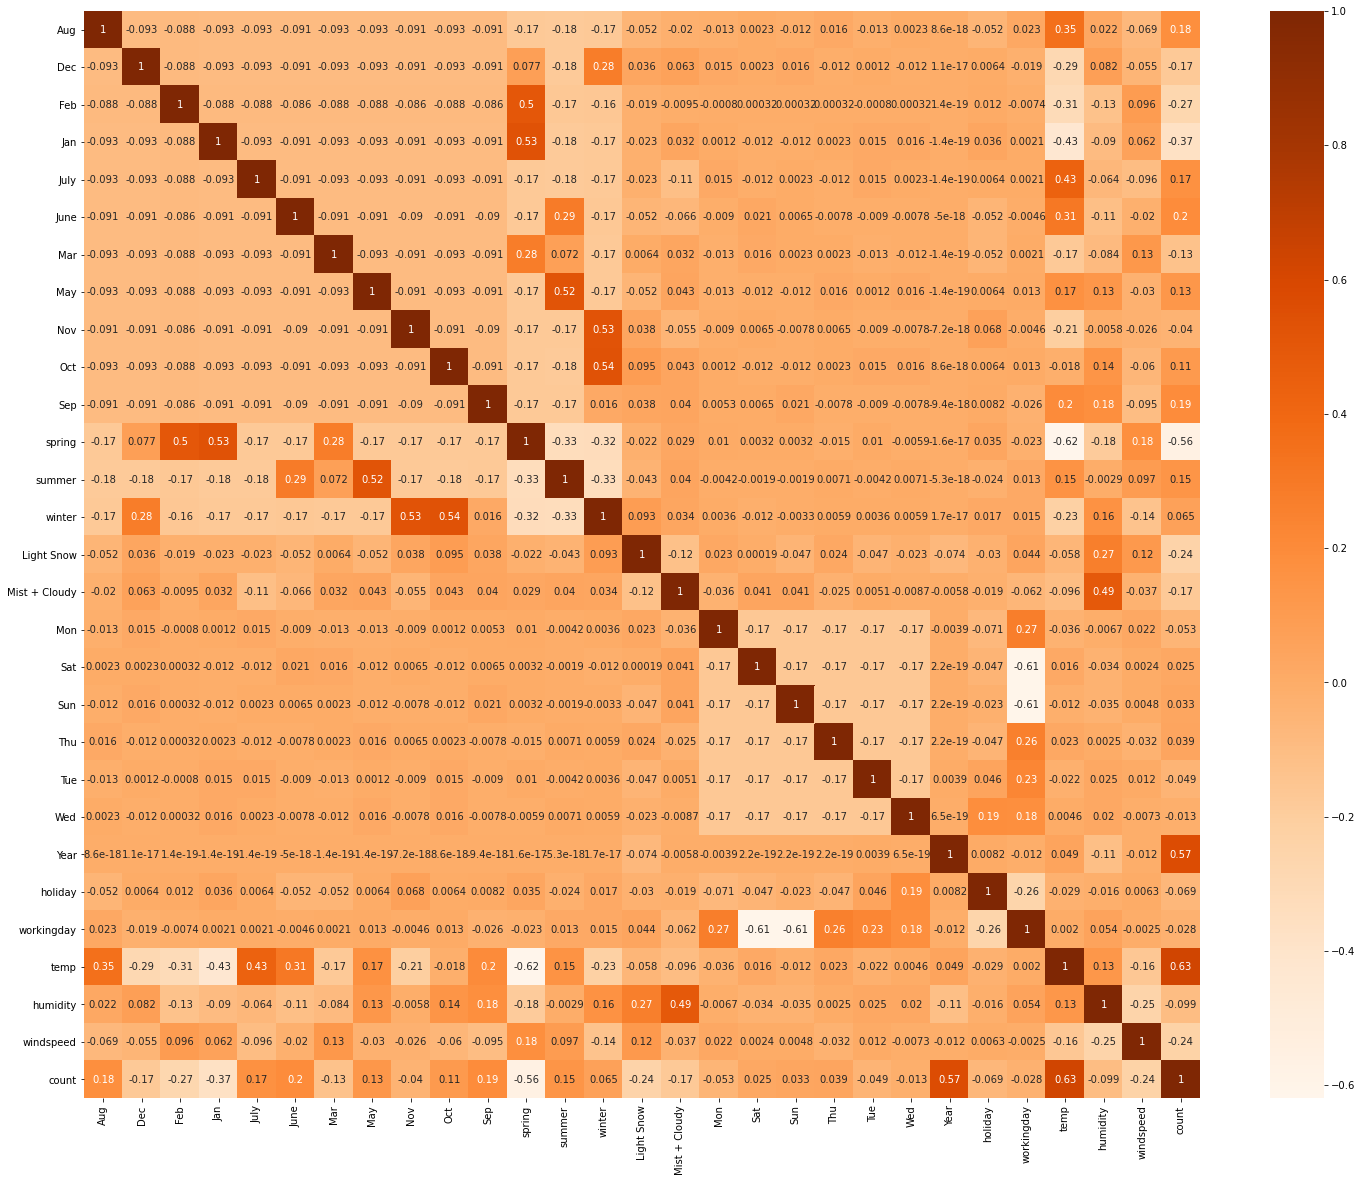

In [148]:
# Plotting the modified dataframe in a heatmatp to check the correlationg between variables.
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='Oranges', annot = True)
plt.show()

### Note:- 

From the above heatmap, we can infer that the following variables are having positive linear relationship with the Predictor variable `count`and could be considered for the model preparation.

- temp, June, july, august, september, october

### Step 7 - Splitting the Data into Training and Testing Sets¶


In [149]:
# Splitting the data in 70:30 ratio using sklearn method
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [150]:
# Checking the shape of the resultant dataframe after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


#### Rescaling the Features


In [151]:
# Importing necessary library
from sklearn.preprocessing import MinMaxScaler

In [152]:
# Instantiate an object
mmscaler = MinMaxScaler()
num_vars=['temp','humidity','windspeed','count']
bike_train[num_vars] = mmscaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,spring,summer,winter,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [153]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,spring,summer,winter,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.243137,0.247059,0.247059,0.029412,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.429398,0.431725,0.431725,0.169124,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Note:-
- We could observe that all the Min = 0 and Max = 1. This means that all the numeric variables fall between 0 and 1.

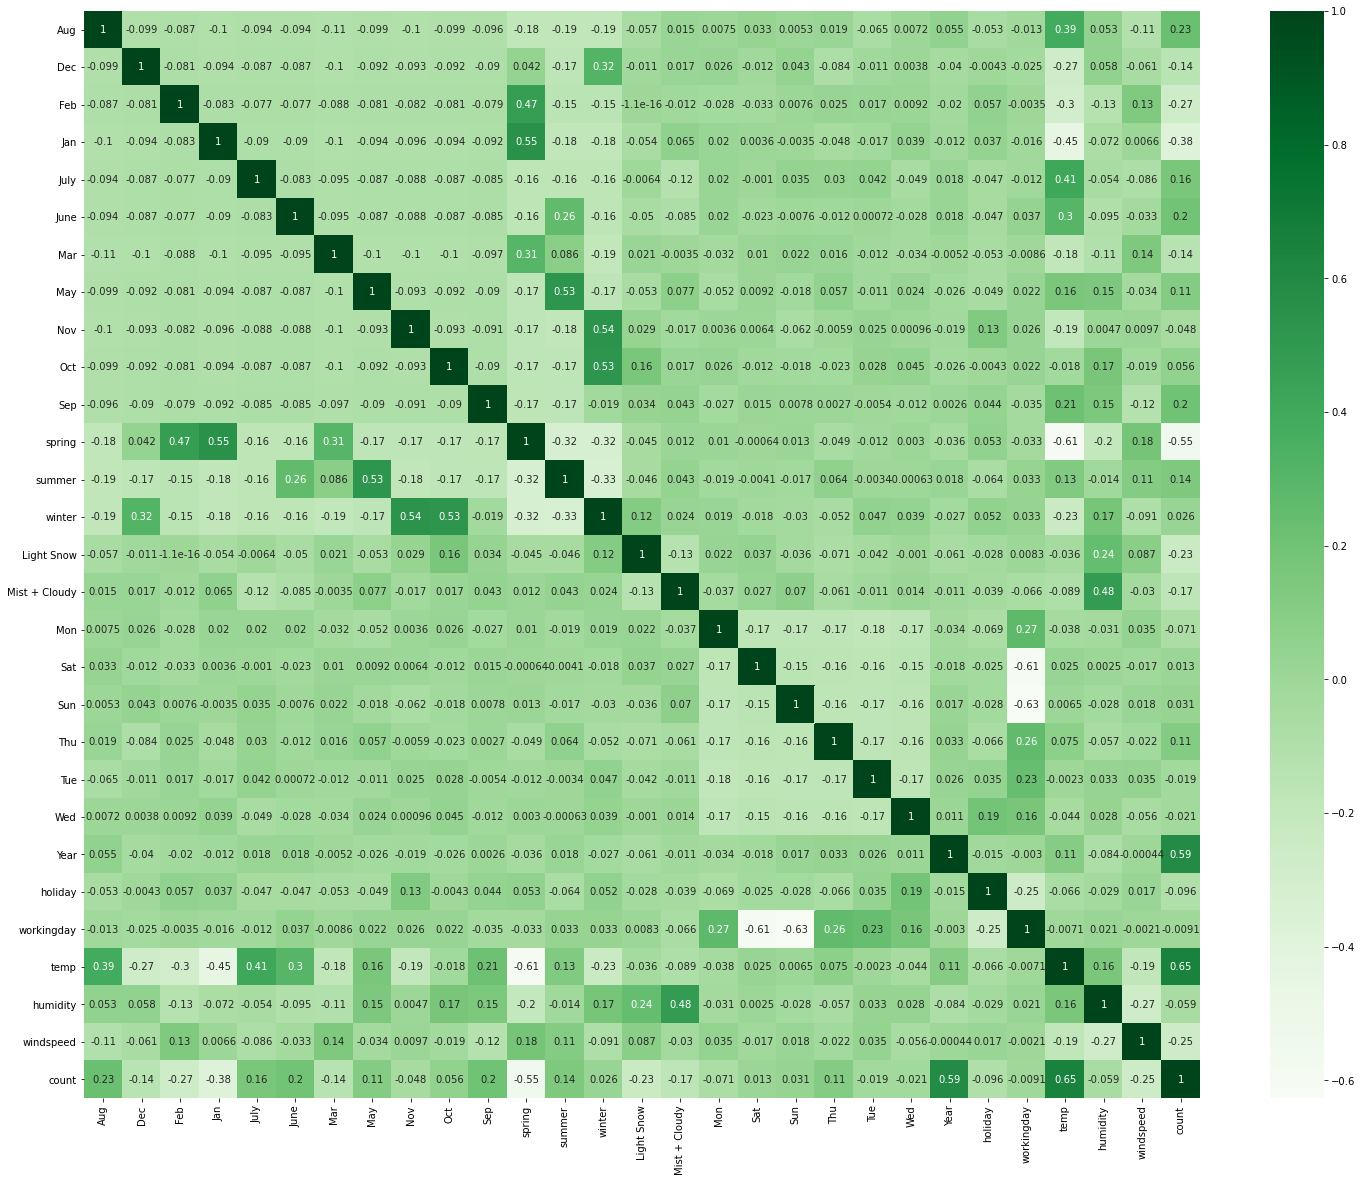

In [154]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='Greens',annot = True)
plt.show()

### Note:-
The above heat map can be used to chek the correlation between variables


### Step 8 - Preparing X and y sets for train and test

In [155]:
# Dividing the data into X and y for data modelling
y_train = bike_train.pop('count')
X_train = bike_train

### Step 9 - Building a linear model

In [156]:
# Performing Recursive Feature Elimination RFE for selecting features (columns)that are more or most relevant in predicting the target variable.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [157]:
# Performing RFE with output number = 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [158]:
# Creating a list of variables for further processing
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [159]:
# Listing the columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'spring', 'summer', 'winter',
       'Light Snow', 'Mist + Cloudy', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [160]:
# Listing the columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

In [161]:
# Creating a dataframe X_test with RFE selected variables
X_train_rfe = X_train[col]

In [162]:
# Adding constant variable to the dataframe X_test
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [163]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [164]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.15e-189
Time:                        22:37:21   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

Verifying VIF will give us an understanding of correlation between the variables.

### Step10 - Dropping insignificant varibles and repeating the model building

In [165]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [166]:
# Calculating the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
9,Mist + Cloudy,2.32
10,Year,2.09
3,Nov,1.85
1,Jan,1.75


In [167]:
#Dropping the column Dec from the dataframe
X_train_new1 = X_train_rfe.drop(["Dec"], axis = 1)

### Model 1

In [168]:
# Re-Building the model with the new dataframe
X_train_lmd1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lmd1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.41e-189
Time:                        22:37:54   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [169]:
X_train_lmd1 = X_train_lmd1.drop(['const'], axis=1)

In [170]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.09
11,temp,16.80
13,windspeed,4.72
4,spring,4.37
6,winter,3.78
5,summer,2.80
8,Mist + Cloudy,2.29
9,Year,2.09
0,Jan,1.67
2,Nov,1.60


In [171]:
#Dropping the variable Nov and rebuilding the model
X_train_new2 = X_train_lmd1.drop(["Nov"], axis = 1)

### Model 2

In [172]:
# Re-Building the model
X_train_lmd2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lmd2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          7.59e-190
Time:                        22:38:11   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.035      8.483

In [173]:
X_train_lmd2=X_train_lmd2.drop(['const'],axis=1)

In [174]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,29.02
10,temp,16.71
12,windspeed,4.66
3,spring,4.34
5,winter,3.36
4,summer,2.79
7,Mist + Cloudy,2.29
8,Year,2.09
0,Jan,1.67
1,July,1.59


In [175]:
#Dropping the variable Jan and rebuilding the model
X_train_new3 = X_train_lmd2.drop(["Jan"], axis = 1)

### Model 3

In [176]:
# Re-Building the model
X_train_lmd3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lmd3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.95e-190
Time:                        22:38:24   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2848      0.034      8.258

In [177]:
X_train_lmd3=X_train_lmd3.drop(['const'],axis=1)

In [178]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,28.03
9,temp,16.03
11,windspeed,4.65
2,spring,4.01
4,winter,3.33
3,summer,2.79
6,Mist + Cloudy,2.28
7,Year,2.08
0,July,1.58
1,Sep,1.38


In [179]:
#Dropping the variable humidity and rebuilding the model
X_train_new4 = X_train_lmd3.drop(["humidity"], axis = 1)

### Model 4

In [180]:
# Re-Building the model
X_train_lmd4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lmd4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.06e-187
Time:                        22:38:38   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [181]:
X_train_lmd4=X_train_lmd4.drop(['const'],axis=1)

In [182]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
3,summer,2.23
2,spring,2.08
7,Year,2.07
4,winter,1.78
0,July,1.58
6,Mist + Cloudy,1.55
1,Sep,1.34
5,Light Snow,1.08


In [183]:
# Dropping the variable holiday and rebuilding the model
X_train_new5=X_train_lmd4.drop(['holiday'],axis=1)

### Model 5

In [184]:
# Re-Building the model
X_train_lmd5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lmd5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.00e-185
Time:                        22:38:54   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1974      0.030      6.593

In [185]:
X_train_lmd5=X_train_lmd5.drop(['const'],axis=1)

In [186]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.09
9,windspeed,4.60
3,summer,2.23
2,spring,2.07
7,Year,2.07
4,winter,1.77
0,July,1.58
6,Mist + Cloudy,1.55
1,Sep,1.33
5,Light Snow,1.08


In [187]:
# Dropping the variable windspeed and rebuilding the model
X_train_new6= X_train_lmd5.drop(['windspeed'], axis=1)

### Model 6

In [188]:
# Re-Building the model
X_train_lmd6=sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lmd6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.15e-179
Time:                        22:39:06   Log-Likelihood:                 474.67
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     500   BIC:                            -887.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1474      0.030      4.971

In [189]:
X_train_lmd6= X_train_lmd6.drop(['const'], axis=1)

In [195]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X =X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.21
7,Year,2.06
3,summer,1.94
0,July,1.58
4,winter,1.56
6,Mist + Cloudy,1.55
2,spring,1.38
1,Sep,1.33
5,Light Snow,1.06


In [196]:
# Dropping the variable July and rebuilding the model
X_train_new7=X_train_lmd6.drop(['July'], axis=1)

### Model 7

In [197]:
# Re-Building the model
X_train_lmd7= sm.add_constant(X_train_new7)
lm7=sm.OLS(y_train,X_train_lmd7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     278.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.52e-179
Time:                        22:42:03   Log-Likelihood:                 471.18
No. Observations:                 510   AIC:                            -924.4
Df Residuals:                     501   BIC:                            -886.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1389      0.030      4.686

In [198]:
X_train_lm7=X_train_lmd7.drop(['const'],axis=1)

In [199]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,2.89
6,Year,2.06
2,summer,1.63
5,Mist + Cloudy,1.55
3,winter,1.41
1,spring,1.31
0,Sep,1.22
4,Light Snow,1.06


### Notes:-

- Based on the 'p' value and 'VIF' insignificant variables are dropped.

- A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- If a VIF is > 10, you have high multicollinearity. 

- R-square value is measured in a scale of 0 to 100%. We have 0.816 or 81.6%, which is good.

- The adjusted R-squared 0.814 or 81%. This measure is important when we deal with multiple variables.

#### The model 7 is finalized after dropping the following columns:-

- Dec
- Nov
- jan
- humidity
- holiday
- windspeed
- July

### Step 11 - Residual Analysis to check whether error terms are normally distributed.

In [200]:
X_train_lmd7

,const,Sep,spring,summer,winter,Light Snow,Mist + Cloudy,Year,temp
576,1.0,0,0,0,0,0,0,1,0.815169
426,1.0,0,1,0,0,0,1,1,0.442393
728,1.0,0,1,0,0,0,0,1,0.245101
482,1.0,0,0,1,0,0,1,1,0.395666
111,1.0,0,0,1,0,0,1,0,0.345824
...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,0.863973
53,1.0,0,1,0,0,0,0,0,0.202618
350,1.0,0,0,0,1,0,1,0,0.248216
79,1.0,0,0,1,0,0,1,0,0.462664


In [201]:
# y train predicted
y_train_pred = lm7.predict(X_train_lmd7)

<Figure size 432x288 with 0 Axes>

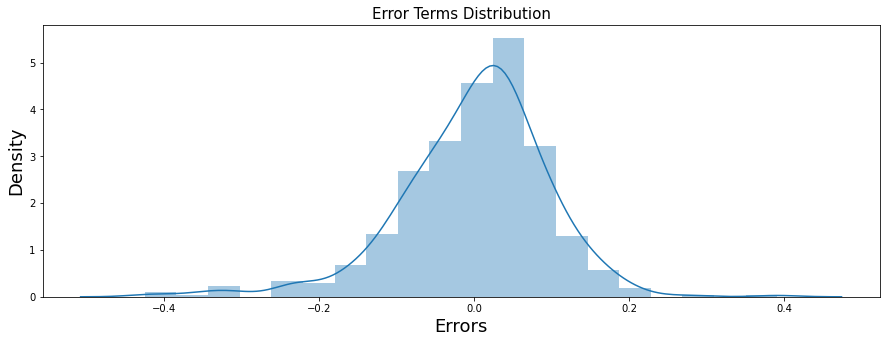

In [203]:
# Plotting the histogram for verifying the error distribution
fig = plt.figure()
plt.figure(figsize=(15,5))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms Distribution', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 18)
plt.ylabel('Density', fontsize = 18)
plt.show()

#### Notes:-

- From the above histogram, we could  observe that the Residuals are normally distributed. Hence we could infer that our assumption of linearity between X and y is valid.

- There is a linear relationship between X and y.

### Step 12 - Making Predictions

In [204]:
# Scaling the test data. [Use only transform]
# Creating the list of numeric variables.

num_vars=['temp','humidity','windspeed','count']

# Fit data
bike_test[num_vars] = mmscaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,spring,summer,winter,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [205]:
# Creating X_test and y_test dataframes
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,spring,summer,winter,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.254545,0.263636,0.236364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.436599,0.441609,0.425817,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [206]:
# Verifying the columns
X_train_new7.columns

Index(['Sep', 'spring', 'summer', 'winter', 'Light Snow', 'Mist + Cloudy',
       'Year', 'temp'],
      dtype='object')

In [207]:
# Making predictions using Model 7.
# A new dataframe X_test_new is created by dropping variables from X_test

X_test_new = X_test[X_train_new7.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,spring,summer,winter,Light Snow,Mist + Cloudy,Year,temp
184,1.0,0,0,0,0,0,1,0,0.831783
535,1.0,0,0,1,0,0,0,1,0.901354
299,1.0,0,0,0,1,0,1,0,0.511964
221,1.0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,1,0,0,0,0,0.817246


In [208]:
# Making predictions
y_pred = lm7.predict(X_test_new1)

### Finding R-squared and Adjusted R-Squared for Test set

In [209]:
# Evaluating R-square for the test set
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8067735483585696

In [210]:
# Evaluating adjusted R^2 for the test set
Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


### Step 13 - Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

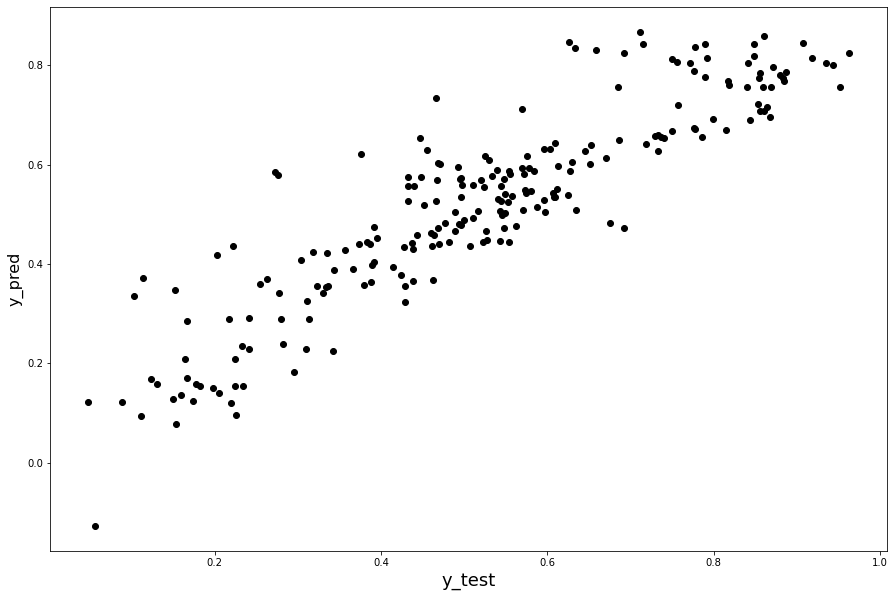

In [214]:
# Plotting y_test and y_pred to verify the data spread.
fig = plt.figure()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred,color='black')
fig.suptitle('y_test vs y_pred', fontsize=22)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

#### Ploting the result on a Regression plot to visualize the fit on the test data set

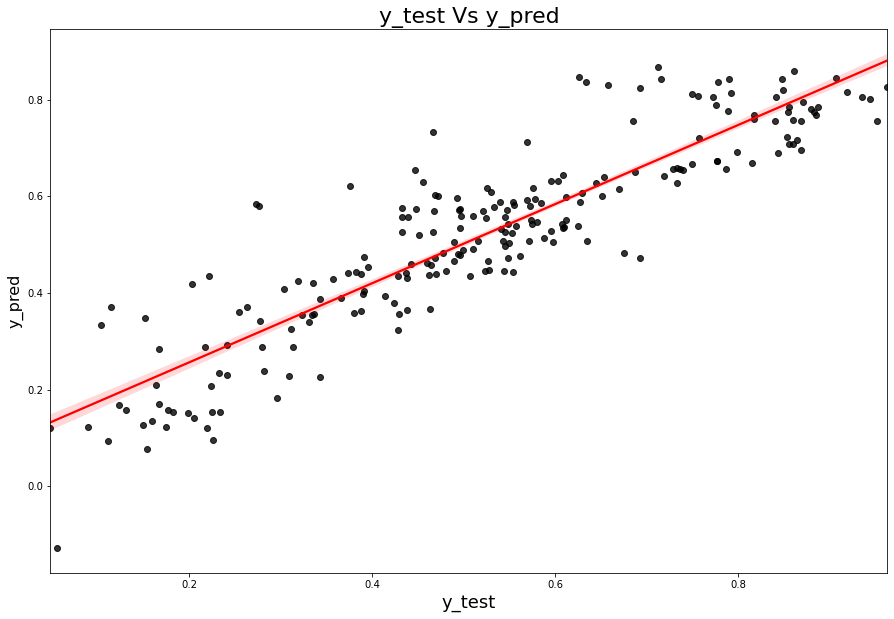

In [213]:
# Plotting on Regression plot
plt.figure(figsize=(15,10))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.title('y_test Vs y_pred', fontsize=22)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()


### Step 14 - Result Comparison Train Vs Test

- Train R^2 :0.816
- Train Adjusted R^2 :0.814
- Test R^2 :0.8067
- Test Adjusted R^2 :0.790564
#### From the above results, we can summarize that the model is a "Generalized" one, which could be used for predicting any similar datasets.

### Summary & Interpretation:-

We can infer that the Top 2 predictor variables in bike booking are:-

- temp (temperature in Celsius): Coefficient value is 0.4910. If the temperature increases by one unit the number of bike rentals increases by 0.4910 units.

- season (1:spring, 2:summer, 3:fall, 4:winter): Summer and Winter seasons have significantly high bike rentals compared to other months.

- In general, the inference is that the Bike Rental is heavily influenced by the Temperature and Seasons. The company should focus more on Winter & Summer seasons.September month looks to be having more bike rentals in 2019. May be the company can think about getting more registered users and offer them some discounts in off season when the weather is not good.